# Introduction to FDTD Simulation
In this lecture, we will describe the basic concepts of EM simulation using FDTD.

- How Maxwell's equations can be solved computationally in the context of a photonic device.
- Discretization of the simulation space using the finite difference method.
- A demonstration on how we solve for the electromagnetic fields radiated by a dipole source.

In [1]:
# imports
import matplotlib.pylab as plt

import tidy3d as td
import tidy3d.web as web

In [2]:
# simulation parameters
side_length = 9.0
grid_size = 50e-3

# apply a PML in all directions
boundary_spec=td.BoundarySpec.all_sides(boundary=td.PML())

# spectrum and resolution parameters
lambda0 = 1.0
freq0 = td.C_0 / lambda0
fwidth = freq0 / 50
run_time = 200 / freq0

In [3]:
# define dipole source at origin pointing in z
dipole_source = td.PointDipole(
    center=(0, 0, 0),
    source_time=td.GaussianPulse(freq0=freq0, fwidth=fwidth),
    polarization='Ez',
    name='dipole',
)

In [4]:
# define monitor to measure fields in xz plane at central frequency
monitor = td.FieldMonitor(
    center=(0,0,0),
    size=(td.inf, 0, td.inf),
    freqs=[freq0],
    name='freq_domain',
)

In [5]:
# define simulation
simulation = td.Simulation(
    size=(side_length, side_length, side_length),
    grid_spec=td.GridSpec.uniform(dl=grid_size),
    structures=[],
    sources=[dipole_source],
    monitors=[monitor],
    run_time=run_time,
    boundary_spec=boundary_spec,
)

In [6]:
# run simulation
sim_data = web.run(simulation, task_name='lecture01_dipole', path='data/data_dipole.hdf5')

21:49:37 +07 Created task 'lecture01_dipole' with task_id                       
             'fdve-20ac0bf3-20d6-4fb3-a293-35f382d02d49' and task_type 'FDTD'.

             View task using web UI at                                          
             ]8;id=20989;https://tidy3d.simulation.cloud/workbench?taskId=fdve-20ac0bf3-20d6-4fb3-a293-35f382d02d49\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=489745;https://tidy3d.simulation.cloud/workbench?taskId=fdve-20ac0bf3-20d6-4fb3-a293-35f382d02d49\taskId]8;;\]8;id=20989;https://tidy3d.simulation.cloud/workbench?taskId=fdve-20ac0bf3-20d6-4fb3-a293-35f382d02d49\=]8;;\]8;id=634374;https://tidy3d.simulation.cloud/workbench?taskId=fdve-20ac0bf3-20d6-4fb3-a293-35f382d02d49\fdve]8;;\]8;id=20989;https://tidy3d.simulation.cloud/workbench?taskId=fdve-20ac0bf3-20d6-4fb3-a293-35f382d02d49\-20ac0bf3-20d]8;;\
             ]8;id=20989;https://tidy3d.simulation.cloud/workbench?taskId=fdve-20ac0bf3-20d6-4fb3-a293-35f382d02d49\6-4fb3-a293-35f382d02d49']8;;\.

/home/elexd/.local/lib/python3.10/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

21:49:40 +07 status = queued

             To cancel the simulation, use 'web.abort(task_id)' or              
             'web.delete(task_id)' or abort/delete the task in the web UI.      
             Terminating the Python script will not stop the job running on the 
             cloud.

21:49:46 +07 status = preprocess

21:49:47 +07 Maximum FlexCredit cost: 0.025. Use 'web.real_cost(task_id)' to get
             the billed FlexCredit cost after a simulation run.

             starting up solver

             running solver

21:49:53 +07 early shutoff detected at 36%, exiting.

             status = postprocess

21:49:54 +07 status = success

             View simulation result at                                          
             ]8;id=230561;https://tidy3d.simulation.cloud/workbench?taskId=fdve-20ac0bf3-20d6-4fb3-a293-35f382d02d49\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=977863;https://tidy3d.simulation.cloud/workbench?taskId=fdve-20ac0bf3-20d6-4fb3-a293-35f382d02d49\taskId]8;;\]8;id=230561;https://tidy3d.simulation.cloud/workbench?taskId=fdve-20ac0bf3-20d6-4fb3-a293-35f382d02d49\=]8;;\]8;id=115596;https://tidy3d.simulation.cloud/workbench?taskId=fdve-20ac0bf3-20d6-4fb3-a293-35f382d02d49\fdve]8;;\]8;id=230561;https://tidy3d.simulation.cloud/workbench?taskId=fdve-20ac0bf3-20d6-4fb3-a293-35f382d02d49\-20ac0bf3-20d]8;;\
             ]8;id=230561;https://tidy3d.simulation.cloud/workbench?taskId=fdve-20ac0bf3-20d6-4fb3-a293-35f382d02d49\6-4fb3-a293-35f382d02d49']8;;\.

21:50:00 +07 loading simulation from data/data_dipole.hdf5

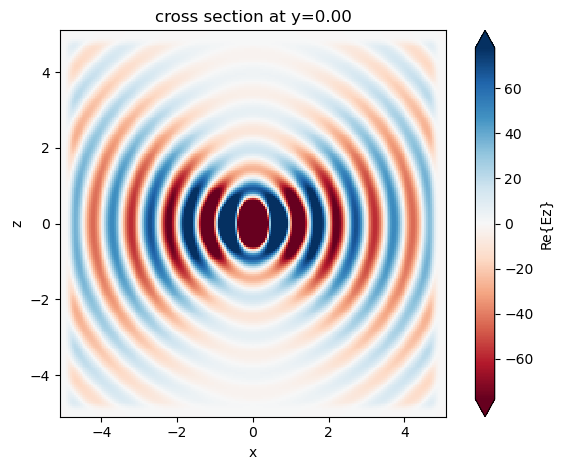

In [7]:
# check that frequency domain fields look good
ax = sim_data.plot_field('freq_domain', 'Ez', y=0, f=freq0)
plt.show()

In [8]:
# define the boxes
epsilon_box = 3
center_offset_box = 1.6
size_box = 1.8
medium=td.Medium(permittivity=epsilon_box,name='medium')

box_top = td.Structure(
    geometry=td.Box(
        center=(0, 0, center_offset_box),
        size=(size_box, size_box, size_box),
    ),
    medium=medium,
    name='box top',
)

bot_bot_r = td.Structure(
    geometry=td.Box(
        center=(+center_offset_box, 0, -center_offset_box),
        size=(size_box, size_box, size_box),
    ),
    medium=medium,
    name='box bottom right',
)

bot_bot_l = td.Structure(
    geometry=td.Box(
        center=(-center_offset_box, 0, -center_offset_box),
        size=(size_box, size_box, size_box),
    ),
    medium=medium,
    name='box bottom left',
)

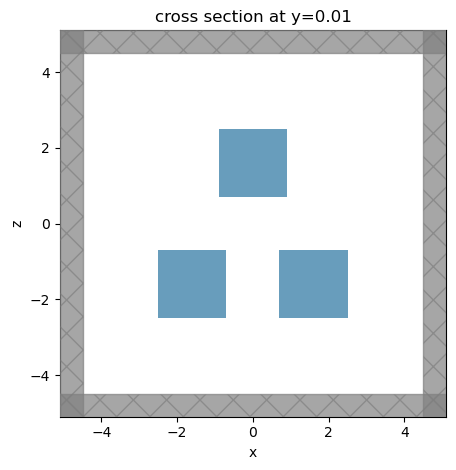

In [9]:
# make a new simulation with the boxes added
simulation_boxes = td.Simulation(
    size=(side_length, side_length, side_length),
    grid_spec=td.GridSpec.uniform(dl=grid_size),
    structures=[box_top, bot_bot_r, bot_bot_l],
    sources=[dipole_source],
    monitors=[monitor],
    run_time=run_time,
    boundary_spec=boundary_spec,
)

# visualize the simulation first, before running
ax = simulation_boxes.plot(y=0.01)
plt.show()

In [10]:
# run simulation
sim_data_boxes = web.run(simulation_boxes, task_name='lecture01_several_box', path='data/data_several_box.hdf5')

21:50:40 +07 Created task 'lecture01_several_box' with task_id                  
             'fdve-ab3dfc72-212c-409a-92df-789cbdfb847a' and task_type 'FDTD'.

             View task using web UI at                                          
             ]8;id=351005;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ab3dfc72-212c-409a-92df-789cbdfb847a\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=666582;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ab3dfc72-212c-409a-92df-789cbdfb847a\taskId]8;;\]8;id=351005;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ab3dfc72-212c-409a-92df-789cbdfb847a\=]8;;\]8;id=701359;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ab3dfc72-212c-409a-92df-789cbdfb847a\fdve]8;;\]8;id=351005;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ab3dfc72-212c-409a-92df-789cbdfb847a\-ab3dfc72-212]8;;\
             ]8;id=351005;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ab3dfc72-212c-409a-92df-789cbdfb847a\c-409a-92df-789cbdfb847a']8;;\.

/home/elexd/.local/lib/python3.10/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

21:50:43 +07 status = queued

             To cancel the simulation, use 'web.abort(task_id)' or              
             'web.delete(task_id)' or abort/delete the task in the web UI.      
             Terminating the Python script will not stop the job running on the 
             cloud.

21:50:57 +07 status = preprocess

21:51:00 +07 Maximum FlexCredit cost: 0.025. Use 'web.real_cost(task_id)' to get
             the billed FlexCredit cost after a simulation run.

             starting up solver

             running solver

21:51:06 +07 early shutoff detected at 60%, exiting.

             status = postprocess

             status = success

             View simulation result at                                          
             ]8;id=999107;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ab3dfc72-212c-409a-92df-789cbdfb847a\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=268282;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ab3dfc72-212c-409a-92df-789cbdfb847a\taskId]8;;\]8;id=999107;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ab3dfc72-212c-409a-92df-789cbdfb847a\=]8;;\]8;id=490503;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ab3dfc72-212c-409a-92df-789cbdfb847a\fdve]8;;\]8;id=999107;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ab3dfc72-212c-409a-92df-789cbdfb847a\-ab3dfc72-212]8;;\
             ]8;id=999107;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ab3dfc72-212c-409a-92df-789cbdfb847a\c-409a-92df-789cbdfb847a']8;;\.

21:51:12 +07 loading simulation from data/data_several_box.hdf5

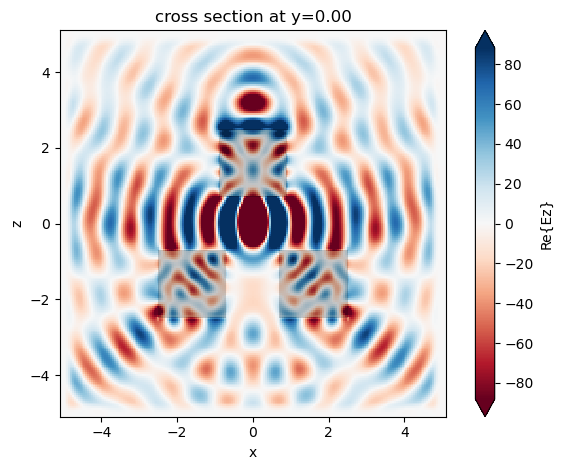

In [11]:
ax = sim_data_boxes.plot_field('freq_domain', 'Ez', y=0, f=freq0)
plt.show()